2: Supervised Classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
################### Complete the code below ###################
# Define a CNN architecture
###############################################################

class CNNModule(nn.Module):
    # taken some of these values from the tutorial linked in the exercise file
    # replaces input channels to 1 since mnist is black and white

    def __init__(self):
        super(CNNModule, self).__init__()
        self.actv_func = nn.ReLU()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(256, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(self.actv_func(self.conv1(x)))
        x = self.pool2(self.actv_func(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.actv_func(self.linear1(x))
        x = self.actv_func(self.linear2(x))
        x = self.linear3(x)
        return x

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# take a stratified subset of the training data, keeping only 5000 samples, with 500 samples per class
train_targets = train_dataset.targets
train_idx, _ = train_test_split(range(len(train_targets)), train_size=20000, stratify=train_targets)
train_dataset = torch.utils.data.Subset(train_dataset, train_idx)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 42.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.76MB/s]


100%|██████████| 157/157 [00:03<00:00, 42.88it/s]


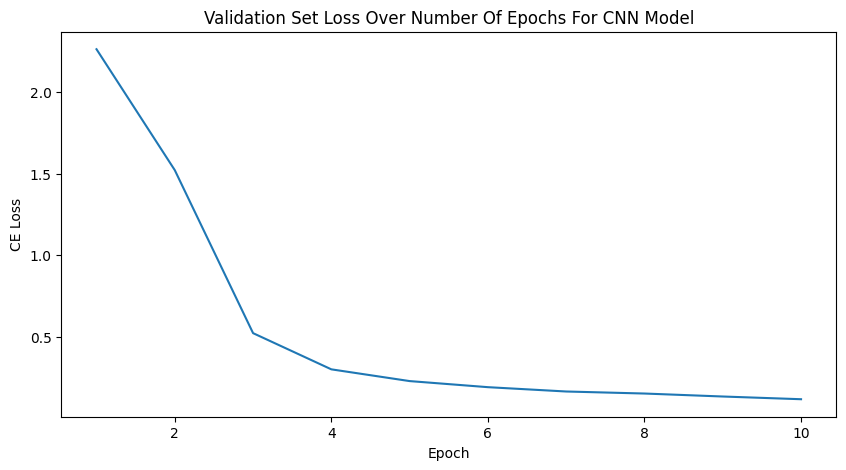

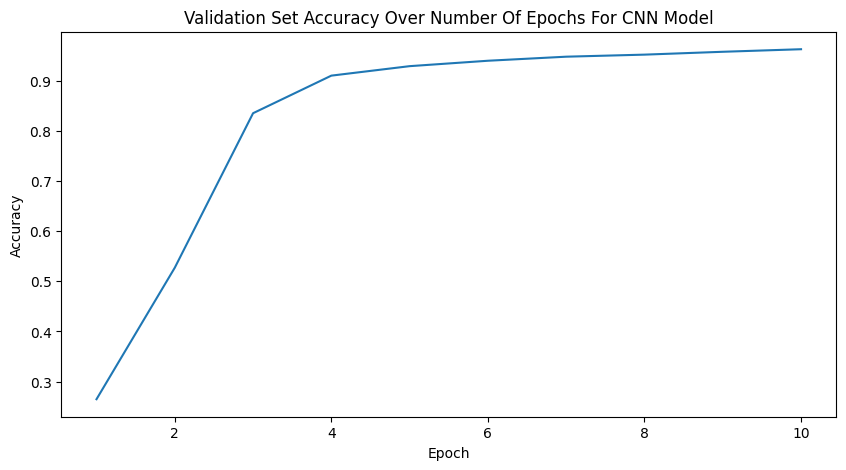

In [ ]:
################### Complete the code below ###################
# Initialize the model, loss function, and optimizer
################### Complete the code below ###################
LR = 0.001
MOMENTUM = 0.9

model = CNNModule()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=LR, momentum=MOMENTUM)

# Training loop
val_losses = []
val_accuracies = []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # moves the model to training mode
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        ################### Complete the code below ###################
        # perform a full iteration of training
        ###############################################################
        optimizer.zero_grad()  # reset grad before training on batch
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation
    model.eval()  # moves the model to evaluation mode
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():  # Temporarily set all the requires_grad flags to false
        for images, labels in tqdm(test_loader):
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    val_loss /= len(test_loader)
    accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(accuracy)

################### Complete the code below ###################
# plot the validation loss and accuracy
###############################################################
plt.figure(figsize=(10, 5))
plt.title("Validation Set Loss Over Number Of Epochs For CNN Model")
plt.plot(range(1, num_epochs+1), val_losses)
plt.xlabel("Epoch")
plt.ylabel("CE Loss")
plt.savefig("val_loss.png")

plt.figure(figsize=(10, 5))
plt.title("Validation Set Accuracy Over Number Of Epochs For CNN Model")
plt.plot(range(1, num_epochs+1), val_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("val_acc.png")